In [114]:
import importlib
imported_module = importlib.import_module("sql_commands")
importlib.reload(imported_module)
import sql_commands
from sql_commands import *
import numpy as np
import matplotlib.pyplot as plt

In [115]:
db_names = ['tpch_2pct', 'tpch_4pct', 'tpch_6pct', 'tpch_8pct', 'tpch_10pct']
null_rates = [0.02, 0.04, 0.06, 0.08, 0.1]
mydb, mycursor = sql_commands.connect_to_db("tpch_2pct")

# Plot Function

In [116]:
def plot_results(results, query_num, y_range):
    # Create an array of indices for the x-axis
    plt.grid(True, zorder=0)
    indices = [int(x*100) for x in null_rates]

    # Horizontal line
    plt.axhline(y=1, color='gray', linestyle='--', zorder=3)

    # Create the bar plot
    plt.bar(indices, results, color='red', zorder=3)

    # Add labels to the x-axis
    plt.xticks(indices, [str(i) for i in indices])

    # Add labels to the y-axis and title to the plot
    plt.ylabel('Average relative Performance')
    plt.xlabel('Null Rate (%)')
    plt.title(f'Query {query_num}+')
    plt.ylim(y_range)

    # Show the plot
    plt.show()

# Query 1

# Query 2

# Query 3

In [117]:
q3_results = []
for db_name in db_names:
    mydb, mycursor = sql_commands.connect_to_db(db_name)
    ratios = []
    for i in range(20):
        result, q3_time, supp_key = run_query3(mycursor, simple=False)
        result, q3_mod_time = run_query3_modified(mycursor, supp_key)
        ratio = q3_mod_time / q3_time
        ratios.append(ratio)
    avg = np.mean(ratios)
    print(f"AVG for {db_name} is {avg:.4} seconds")
    q3_results.append(avg)

AVG for tpch_2pct is 0.9347 seconds
AVG for tpch_4pct is 1.073 seconds
AVG for tpch_6pct is 1.062 seconds
AVG for tpch_8pct is 1.112 seconds
AVG for tpch_10pct is 1.005 seconds


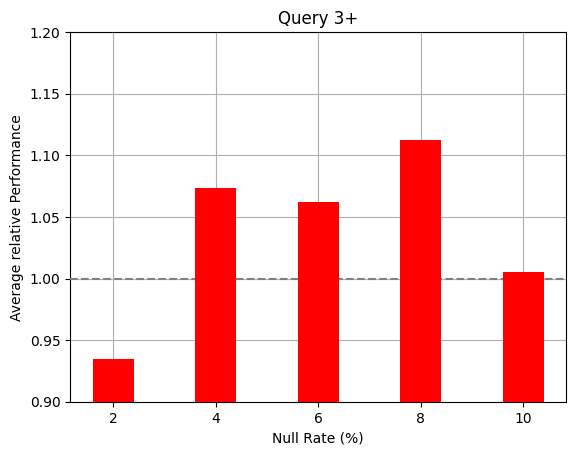

In [119]:
plot_results(q3_results, "3", (0.9,1.2))

# Query 4